<a href="https://colab.research.google.com/github/arsengir/colab/blob/main/churn_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/shubh0799/churn-modelling

https://drive.google.com/file/d/1XImRIoVQy9xzDj8OCS3_PoCf3JJOPHtp/view?usp=sharing

In [2]:
! gdown 1XImRIoVQy9xzDj8OCS3_PoCf3JJOPHtp

Downloading...
From: https://drive.google.com/uc?id=1XImRIoVQy9xzDj8OCS3_PoCf3JJOPHtp
To: /content/churn_modelling.zip
100% 268k/268k [00:00<00:00, 31.8MB/s]


In [3]:
! unzip /content/churn_modelling.zip

Archive:  /content/churn_modelling.zip
  inflating: Churn_Modelling.csv     


In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('Churn_Modelling.csv')

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Анализ данных

In [7]:
len(df)

10000

In [8]:
df.isna().mean()

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [9]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [10]:
df['Exited'].value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

In [11]:
df['Exited'].mean()

0.2037

# Обучающая, валидационная и тестовая выборка

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train, test = train_test_split(df, train_size=0.6, random_state=42, stratify=df['Exited'])

In [14]:
val, test = train_test_split(test, train_size=0.5, random_state=42, stratify=test['Exited'])

In [15]:
train['Exited'].mean()

0.20366666666666666

In [16]:
test['Exited'].mean()

0.2035

In [17]:
val['Exited'].mean()

0.204

# Phik

In [18]:
train_full = pd.concat([train, val])

In [19]:
train_full

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6851,6852,15779103,Cantamessa,527,Germany,Female,39,9,96748.89,2,1,0,94711.43,0
7026,7027,15588123,Horton,677,France,Female,27,2,0.00,2,0,1,114685.92,0
5705,5706,15698703,Doherty,628,Germany,Male,40,5,181768.32,2,1,1,129107.97,0
9058,9059,15802560,Moran,470,Spain,Female,48,6,140576.11,1,1,1,116971.05,0
9415,9416,15750407,Hunt,768,Germany,Female,43,2,129264.05,2,0,0,19150.14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926,927,15628303,Thurgood,738,Spain,Male,35,3,0.00,1,1,1,15650.73,0
6727,6728,15610416,Christie,745,France,Female,36,9,0.00,1,1,0,19605.18,1
4745,4746,15655410,Hinton,768,Germany,Male,49,1,133384.66,1,1,0,102397.22,1
1307,1308,15638806,Blackburn,645,Spain,Male,49,2,0.00,2,0,0,10023.15,0


In [20]:
! pip install phik

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.8/679.8 KB 7.2 MB/s eta 0:00:00


In [21]:
import phik

In [22]:
phik_overview = train_full.phik_matrix()

interval columns not set, guessing: ['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


/usr/local/lib/python3.9/dist-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable Surname is large: 2591. Are you sure this is not an interval variable? Analysis for pairs of variables including Surname can be slow.
  warnings.warn(


In [23]:
phik_overview['Exited'].sort_values(ascending=False)

Exited             1.000000
NumOfProducts      0.564969
Age                0.498768
IsActiveMember     0.237244
Balance            0.167823
Gender             0.165231
CreditScore        0.105371
Geography          0.104047
CustomerId         0.035477
Tenure             0.030333
RowNumber          0.000000
Surname            0.000000
HasCrCard          0.000000
EstimatedSalary    0.000000
Name: Exited, dtype: float64

# Человеческое обучение

In [24]:
train_full.groupby('NumOfProducts')['Exited'].agg(['count','mean'])

,count,mean
NumOfProducts,,
1,4060,0.275369
2,3673,0.077049
3,219,0.826484
4,48,1.000000


In [25]:
model = train_full.groupby('NumOfProducts')['Exited'].mean().reset_index()

In [26]:
model = model.rename({'Exited':'score_prod'}, axis=1)

In [27]:
train_full = train_full.merge(model, how='left', on='NumOfProducts')

In [28]:
train_full

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod
0,6852,15779103,Cantamessa,527,Germany,Female,39,9,96748.89,2,1,0,94711.43,0,0.077049
1,7027,15588123,Horton,677,France,Female,27,2,0.00,2,0,1,114685.92,0,0.077049
2,5706,15698703,Doherty,628,Germany,Male,40,5,181768.32,2,1,1,129107.97,0,0.077049
3,9059,15802560,Moran,470,Spain,Female,48,6,140576.11,1,1,1,116971.05,0,0.275369
4,9416,15750407,Hunt,768,Germany,Female,43,2,129264.05,2,0,0,19150.14,0,0.077049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,927,15628303,Thurgood,738,Spain,Male,35,3,0.00,1,1,1,15650.73,0,0.275369
7996,6728,15610416,Christie,745,France,Female,36,9,0.00,1,1,0,19605.18,1,0.275369
7997,4746,15655410,Hinton,768,Germany,Male,49,1,133384.66,1,1,0,102397.22,1,0.275369
7998,1308,15638806,Blackburn,645,Spain,Male,49,2,0.00,2,0,0,10023.15,0,0.077049


# Baseline

In [29]:
train_full['score_mean'] = train_full['Exited'].mean()

In [30]:
train_full

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod,score_mean
0,6852,15779103,Cantamessa,527,Germany,Female,39,9,96748.89,2,1,0,94711.43,0,0.077049,0.20375
1,7027,15588123,Horton,677,France,Female,27,2,0.00,2,0,1,114685.92,0,0.077049,0.20375
2,5706,15698703,Doherty,628,Germany,Male,40,5,181768.32,2,1,1,129107.97,0,0.077049,0.20375
3,9059,15802560,Moran,470,Spain,Female,48,6,140576.11,1,1,1,116971.05,0,0.275369,0.20375
4,9416,15750407,Hunt,768,Germany,Female,43,2,129264.05,2,0,0,19150.14,0,0.077049,0.20375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,927,15628303,Thurgood,738,Spain,Male,35,3,0.00,1,1,1,15650.73,0,0.275369,0.20375
7996,6728,15610416,Christie,745,France,Female,36,9,0.00,1,1,0,19605.18,1,0.275369,0.20375
7997,4746,15655410,Hinton,768,Germany,Male,49,1,133384.66,1,1,0,102397.22,1,0.275369,0.20375
7998,1308,15638806,Blackburn,645,Spain,Male,49,2,0.00,2,0,0,10023.15,0,0.077049,0.20375


In [31]:
from sklearn.metrics import log_loss

In [32]:
log_loss(train_full['Exited'], train_full['score_mean'])

0.5055572860042145

In [33]:
log_loss(train_full['Exited'], train_full['score_prod'])

0.4359616823203511

#Uplift

In [34]:
train_full

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod,score_mean
0,6852,15779103,Cantamessa,527,Germany,Female,39,9,96748.89,2,1,0,94711.43,0,0.077049,0.20375
1,7027,15588123,Horton,677,France,Female,27,2,0.00,2,0,1,114685.92,0,0.077049,0.20375
2,5706,15698703,Doherty,628,Germany,Male,40,5,181768.32,2,1,1,129107.97,0,0.077049,0.20375
3,9059,15802560,Moran,470,Spain,Female,48,6,140576.11,1,1,1,116971.05,0,0.275369,0.20375
4,9416,15750407,Hunt,768,Germany,Female,43,2,129264.05,2,0,0,19150.14,0,0.077049,0.20375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,927,15628303,Thurgood,738,Spain,Male,35,3,0.00,1,1,1,15650.73,0,0.275369,0.20375
7996,6728,15610416,Christie,745,France,Female,36,9,0.00,1,1,0,19605.18,1,0.275369,0.20375
7997,4746,15655410,Hinton,768,Germany,Male,49,1,133384.66,1,1,0,102397.22,1,0.275369,0.20375
7998,1308,15638806,Blackburn,645,Spain,Male,49,2,0.00,2,0,0,10023.15,0,0.077049,0.20375


In [35]:
train_full['Exited'].sample(frac=0.2, random_state = 42).mean()

0.210625

In [36]:
exited_all = train_full['Exited'].sum()

In [37]:
train_full['Exited'].sample(frac=0.2, random_state = 42).sum()

337

In [38]:
train_full['Exited'].sample(frac=0.2, random_state = 42).sum() / exited_all

0.2067484662576687

In [39]:
train_full = train_full.sort_values('score_prod', ascending=False)

In [40]:
round(len(train_full)*0.2)

1600

In [41]:
train_full.head(round(len(train_full)*0.2))['Exited'].sum() / exited_all

0.3576687116564417

In [42]:
0.3576687116564417 / 0.2067484662576687

1.7299703264094954

# Добавим шум

In [43]:
import numpy as np

In [44]:
np.random.seed(42)
np.random.uniform(0, 0.001, size=len(train_full))

array([0.00037454, 0.00095071, 0.00073199, ..., 0.00045533, 0.00090844,
       0.00010448])

In [45]:
np.random.seed(42)
train_full['score_prod'] = train_full['score_prod'] - np.random.uniform(0, 0.001, size=len(train_full))

In [46]:
train_full['score_prod'].nunique()

8000

# Функция для uplift

In [47]:
def uplift(df, score, pct):
  exited_all = df['Exited'].sum()
  df = df.sort_values(score, ascending=False)
  exited_found = df.head(round(len(df)*pct))['Exited'].sum()

  return exited_found/exited_all / pct

In [48]:
uplift(train_full, 'score_prod', 0.2)

1.9079754601226995

In [49]:
test = test.merge(model, how='left', on='NumOfProducts')

In [50]:
np.random.seed(42)
test['score_prod'] = test['score_prod'] - np.random.uniform(0, 0.001, size=len(test))

In [51]:
log_loss(train_full['Exited'], train_full['score_prod'])

0.4359717821616623

In [52]:
log_loss(test['Exited'], test['score_prod'])

0.4338658337619006

In [53]:
uplift(test, 'score_prod', 0.2)

1.8427518427518426

# Добавим возвраст

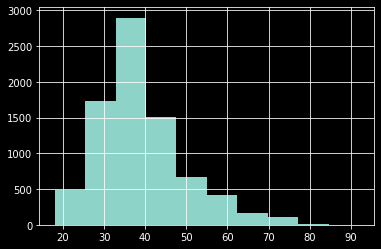

In [54]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
train_full['Age'].hist();

In [55]:
pd.qcut(train_full['Age'], 5, retbins=True, labels=False)

(6946    4
 1245    2
 7056    4
 7847    4
 693     3
        ..
 1742    1
 4912    4
 4913    2
 4914    3
 0       2
 Name: Age, Length: 8000, dtype: int64, array([18., 31., 35., 40., 46., 92.]))

In [56]:
train_full['age_group'] = pd.qcut(train_full['Age'], 5)

In [57]:
train_full.groupby('age_group')['Exited'].agg(['count','mean'])

,count,mean
age_group,,
"(17.999, 31.0]",1896,0.075422
"(31.0, 35.0]",1424,0.091994
"(35.0, 40.0]",1797,0.146912
"(40.0, 46.0]",1376,0.289971
"(46.0, 92.0]",1507,0.459854


In [58]:
train_full['age_group'] = pd.cut(train_full['Age'], [0, 31, 35, 40, 46, float('inf')])

In [59]:
train_full.groupby('age_group')['Exited'].agg(['count','mean'])

,count,mean
age_group,,
"(0.0, 31.0]",1896,0.075422
"(31.0, 35.0]",1424,0.091994
"(35.0, 40.0]",1797,0.146912
"(40.0, 46.0]",1376,0.289971
"(46.0, inf]",1507,0.459854


In [60]:
model = train_full.groupby(['NumOfProducts','age_group'])['Exited'].mean().reset_index()

In [61]:
model = model.rename({'Exited':'score_prod_age'}, axis=1)

In [62]:
model

,NumOfProducts,age_group,score_prod_age
0,1,"(0.0, 31.0]",0.106774
1,1,"(31.0, 35.0]",0.135908
2,1,"(35.0, 40.0]",0.198646
3,1,"(40.0, 46.0]",0.378873
4,1,"(46.0, inf]",0.542506
5,2,"(0.0, 31.0]",0.029293
6,2,"(31.0, 35.0]",0.031206
7,2,"(35.0, 40.0]",0.059977
8,2,"(40.0, 46.0]",0.106239
9,2,"(46.0, inf]",0.225869


In [63]:
train_full = train_full.merge(model, how='left', on=['NumOfProducts','age_group'])

In [64]:
train_full

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod,score_mean,age_group,score_prod_age
0,6876,15665283,Brookes,610,France,Female,57,7,72092.95,4,0,1,113228.82,1,0.999625,0.20375,"(46.0, inf]",1.000000
1,3153,15724161,Sutton,644,France,Female,40,9,137285.26,4,1,0,77063.63,1,0.999049,0.20375,"(35.0, 40.0]",1.000000
2,2542,15679770,Smith,611,France,Female,61,3,131583.59,4,0,1,66238.23,1,0.999268,0.20375,"(46.0, inf]",1.000000
3,1702,15605279,Francis,792,France,Male,50,9,0.00,4,1,1,194700.81,1,0.999401,0.20375,"(46.0, inf]",1.000000
4,7568,15750545,Chidiebere,629,France,Male,44,5,0.00,4,0,0,117572.59,1,0.999844,0.20375,"(40.0, 46.0]",1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,7543,15768777,Wang,507,Spain,Female,34,4,0.00,2,1,1,60688.38,0,0.076776,0.20375,"(31.0, 35.0]",0.031206
7996,4011,15685654,Allan,514,Spain,Male,66,9,0.00,2,1,1,14234.31,0,0.076839,0.20375,"(46.0, inf]",0.225869
7997,4872,15575858,Bergamaschi,763,France,Male,40,3,0.00,2,1,0,134281.11,0,0.076593,0.20375,"(35.0, 40.0]",0.059977
7998,1650,15569423,Cunningham,731,Spain,Male,41,4,0.00,2,1,0,22299.27,0,0.076140,0.20375,"(40.0, 46.0]",0.106239


In [65]:
log_loss(train_full['Exited'], train_full['score_prod'])

0.4359717821616623

In [66]:
uplift(train_full, 'score_prod', 0.2)

1.9079754601226995

In [67]:
log_loss(train_full['Exited'], train_full['score_prod_age'])

0.3866695862492173

In [68]:
uplift(train_full, 'score_prod_age', 0.2)

2.7116564417177913

In [69]:
log_loss(test['Exited'], test['score_prod'])

0.4338658337619006

In [70]:
uplift(test, 'score_prod', 0.2)

1.8427518427518426

In [71]:
test['age_group'] = pd.cut(test['Age'], [0, 31, 35, 40, 46, float('inf')])

In [72]:
test = test.merge(model, how='left', on=['NumOfProducts','age_group'])

In [73]:
log_loss(test['Exited'], test['score_prod_age'])

0.3870707514157596

In [74]:
uplift(test, 'score_prod_age', 0.2)

2.7518427518427515

# Добавим IsActiveMember

In [75]:
train_full['IsActiveMember'].value_counts()

1    4131
0    3869
Name: IsActiveMember, dtype: int64

In [76]:
train_full.groupby('IsActiveMember')['Exited'].agg(['count','mean'])

,count,mean
IsActiveMember,,
0,3869,0.267511
1,4131,0.144033


In [77]:
model = train_full.groupby(['NumOfProducts','age_group','IsActiveMember'])['Exited'].mean().reset_index()

In [78]:
model = model.rename({'Exited':'score_prod_age_active'}, axis=1)

In [79]:
train_full = train_full.merge(model, how='left', on=['NumOfProducts','age_group', 'IsActiveMember'])

In [80]:
test = test.merge(model, how='left', on=['NumOfProducts','age_group','IsActiveMember'])

In [81]:
def print_metrics(df, score):
  print(log_loss(df['Exited'], df[score]))
  print(uplift(df, score, 0.2))

In [82]:
print_metrics(train_full,'score_prod_age')

0.3866695862492173
2.7116564417177913


In [83]:
print_metrics(test,'score_prod_age')

0.3870707514157596
2.7518427518427515


In [84]:
print_metrics(train_full,'score_prod_age_active')

0.36550197514510024
2.8496932515337425


In [85]:
print_metrics(test,'score_prod_age_active')

0.3638472889481342
2.862407862407862


# Машинное обучение

In [86]:
! pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 9.9 MB/s eta 0:00:00


In [87]:
from catboost import CatBoostClassifier

In [88]:
train_full.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'score_prod',
       'score_mean', 'age_group', 'score_prod_age', 'score_prod_age_active'],
      dtype='object')

In [89]:
X = ['NumOfProducts', 'Age', 'IsActiveMember']
y = ['Exited']

In [90]:
params = {
    'verbose':100,
    'random_seed':42,
    'learning_rate':0.01
}

In [91]:
model = CatBoostClassifier(**params)

In [92]:
model.fit(train[X], train[y], eval_set=(val[X],val[y]))

0:	learn: 0.6849803	test: 0.6849389	best: 0.6849389 (0)	total: 63.5ms	remaining: 1m 3s
100:	learn: 0.3991169	test: 0.3930537	best: 0.3930537 (100)	total: 408ms	remaining: 3.63s
200:	learn: 0.3659581	test: 0.3563817	best: 0.3563817 (200)	total: 601ms	remaining: 2.39s
300:	learn: 0.3589224	test: 0.3476566	best: 0.3476566 (300)	total: 805ms	remaining: 1.87s
400:	learn: 0.3565171	test: 0.3446648	best: 0.3446648 (400)	total: 1.01s	remaining: 1.51s
500:	learn: 0.3553274	test: 0.3433005	best: 0.3432984 (498)	total: 1.2s	remaining: 1.2s
600:	learn: 0.3544987	test: 0.3425379	best: 0.3425379 (600)	total: 1.4s	remaining: 928ms
700:	learn: 0.3539638	test: 0.3421168	best: 0.3421135 (699)	total: 1.58s	remaining: 675ms
800:	learn: 0.3532817	test: 0.3419139	best: 0.3419139 (800)	total: 1.93s	remaining: 480ms
900:	learn: 0.3524351	test: 0.3416923	best: 0.3416923 (900)	total: 2.19s	remaining: 240ms
999:	learn: 0.3513546	test: 0.3417688	best: 0.3416551 (927)	total: 2.38s	remaining: 0us

bestTest = 0.3416

In [93]:
test['score_cat_prod_age_active'] = model.predict_proba(test[X])[:,1]

In [94]:
test

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod,age_group,score_prod_age,score_prod_age_active,score_cat_prod_age_active
0,9168,15645353,Chubb,607,France,Male,26,1,0.00,1,1,0,29818.20,0,0.274995,"(0.0, 31.0]",0.106774,0.143885,0.127267
1,9388,15594576,Zhdanov,524,France,Male,32,1,144875.71,1,0,0,187740.04,0,0.274419,"(31.0, 35.0]",0.135908,0.177650,0.160071
2,6860,15811927,Marcelo,733,France,Female,38,3,157658.36,1,0,0,19658.43,0,0.274637,"(35.0, 40.0]",0.198646,0.223714,0.235787
3,3501,15675675,Slate,850,France,Female,32,5,106290.64,1,1,0,121982.73,0,0.274771,"(31.0, 35.0]",0.135908,0.177650,0.160071
4,6234,15682914,Bolton,850,France,Male,34,2,72079.71,1,1,1,115767.93,0,0.275213,"(31.0, 35.0]",0.135908,0.094286,0.102859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7393,15795079,Nnaife,596,Spain,Male,67,6,0.00,2,1,1,138350.74,0,0.076392,"(46.0, inf]",0.225869,0.134048,0.052185
1996,3234,15601550,Genovesi,595,Spain,Male,36,6,85768.42,1,1,1,24802.77,0,0.274413,"(35.0, 40.0]",0.198646,0.173121,0.127713
1997,219,15659366,Shih,807,France,Male,43,1,105799.32,2,1,0,34888.04,1,0.076980,"(40.0, 46.0]",0.106239,0.144262,0.147568
1998,4756,15740072,Padovesi,720,France,Female,37,2,120328.88,2,1,1,138470.21,0,0.076992,"(35.0, 40.0]",0.059977,0.042353,0.039976


In [95]:
test['score_cat_prod_age_active'].nunique()

254

In [96]:
print_metrics(test,'score_prod_age_active')

0.3638472889481342
2.862407862407862


In [97]:
print_metrics(test,'score_cat_prod_age_active')

0.35878132799643003
2.899262899262899


# Обучимся на всех фичах

In [98]:
train.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [99]:
train

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6851,6852,15779103,Cantamessa,527,Germany,Female,39,9,96748.89,2,1,0,94711.43,0
7026,7027,15588123,Horton,677,France,Female,27,2,0.00,2,0,1,114685.92,0
5705,5706,15698703,Doherty,628,Germany,Male,40,5,181768.32,2,1,1,129107.97,0
9058,9059,15802560,Moran,470,Spain,Female,48,6,140576.11,1,1,1,116971.05,0
9415,9416,15750407,Hunt,768,Germany,Female,43,2,129264.05,2,0,0,19150.14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,1468,15681843,Barbour,624,Germany,Female,35,0,180303.24,2,1,0,163587.90,0
4644,4645,15714240,Ponomarev,712,Spain,Male,74,5,0.00,2,0,0,151425.82,0
8942,8943,15709780,Azuka,667,France,Female,37,9,71786.90,2,1,1,67734.79,0
2935,2936,15689425,Olejuru,687,Spain,Male,35,8,100988.39,2,1,0,22247.27,0


In [100]:
train.select_dtypes(include='object')

,Surname,Geography,Gender
6851,Cantamessa,Germany,Female
7026,Horton,France,Female
5705,Doherty,Germany,Male
9058,Moran,Spain,Female
9415,Hunt,Germany,Female
...,...,...,...
1467,Barbour,Germany,Female
4644,Ponomarev,Spain,Male
8942,Azuka,France,Female
2935,Olejuru,Spain,Male


In [101]:
X = [ 'CustomerId', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']
cat_features = ['Geography', 'Gender']
y = ['Exited']

https://www.kaggle.com/code/mitribunskiy/tutorial-catboost-overview

In [102]:
from catboost import Pool

train_data = Pool(data=train[X],
                  label=train[y],
                  cat_features=cat_features
                 )

valid_data = Pool(data=val[X],
                  label=val[y],
                  cat_features=cat_features
                 )

In [103]:
params = {
    'verbose':100,
    'random_seed':42,
    'learning_rate':0.01
}

In [104]:
model = CatBoostClassifier(**params)

In [105]:
model.fit(train_data, eval_set=valid_data)

0:	learn: 0.6848575	test: 0.6849145	best: 0.6849145 (0)	total: 12.5ms	remaining: 12.5s
100:	learn: 0.3908412	test: 0.3894043	best: 0.3894043 (100)	total: 902ms	remaining: 8.03s
200:	learn: 0.3457312	test: 0.3445503	best: 0.3445503 (200)	total: 1.77s	remaining: 7.05s
300:	learn: 0.3288071	test: 0.3307084	best: 0.3307084 (300)	total: 2.71s	remaining: 6.29s
400:	learn: 0.3192987	test: 0.3252459	best: 0.3252459 (400)	total: 3.45s	remaining: 5.15s
500:	learn: 0.3120470	test: 0.3221057	best: 0.3221057 (500)	total: 4.18s	remaining: 4.16s
600:	learn: 0.3054735	test: 0.3204300	best: 0.3204300 (600)	total: 5.62s	remaining: 3.73s
700:	learn: 0.2997053	test: 0.3192377	best: 0.3192377 (700)	total: 7.44s	remaining: 3.17s
800:	learn: 0.2946934	test: 0.3188206	best: 0.3187917 (794)	total: 10s	remaining: 2.5s
900:	learn: 0.2890177	test: 0.3185731	best: 0.3185731 (900)	total: 12.2s	remaining: 1.34s
999:	learn: 0.2831978	test: 0.3186396	best: 0.3185004 (978)	total: 14.1s	remaining: 0us

bestTest = 0.3185

In [106]:
test['score_cat_all_features'] = model.predict_proba(test[X])[:,1]

In [107]:
print_metrics(test,'score_cat_prod_age_active')

0.35878132799643003
2.899262899262899


In [108]:
print_metrics(test,'score_cat_all_features')

0.3296082204006806
3.1449631449631448


# Feature importances

In [109]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,NumOfProducts,27.408724
1,Age,21.567747
2,Balance,11.455919
3,Geography,10.011145
4,IsActiveMember,7.420335
5,EstimatedSalary,5.163513
6,CustomerId,4.965796
7,CreditScore,4.482999
8,Tenure,3.637201
9,Gender,3.089379


#Shap

In [110]:
! pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 10.6 MB/s eta 0:00:00


In [111]:
import shap
shap.initjs()

In [112]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(test[X])

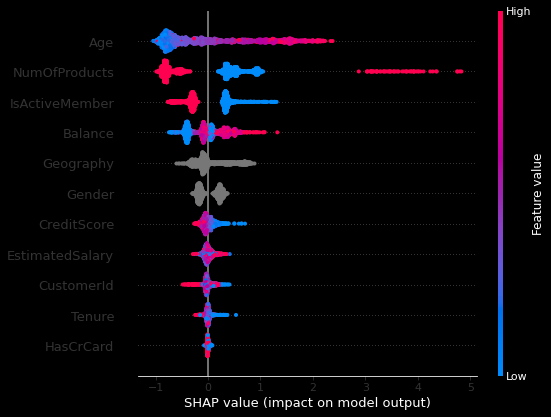

In [113]:
shap.summary_plot(shap_values, test[X])

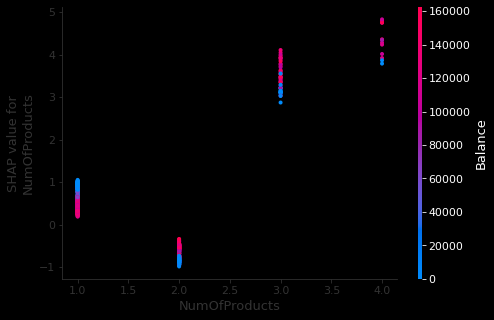

In [114]:
shap.dependence_plot("NumOfProducts", shap_values, test[X])

In [115]:
features = model.get_feature_importance(prettified=True)['Feature Id'].values

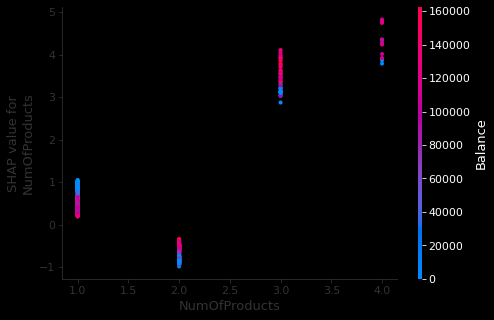

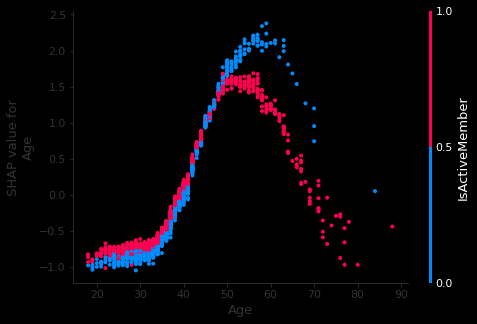

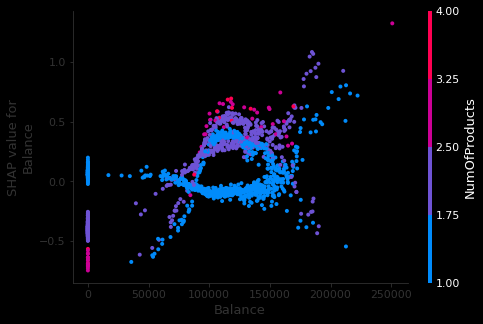

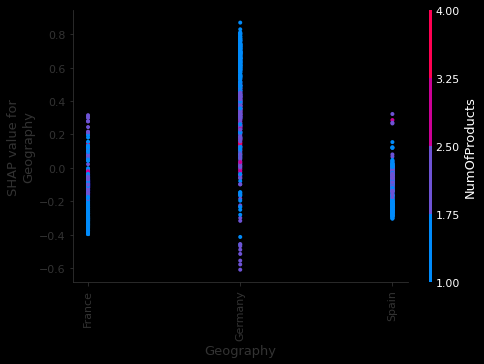

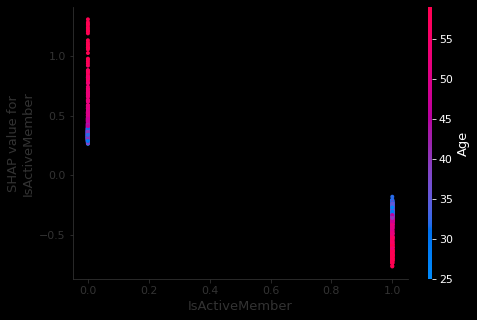

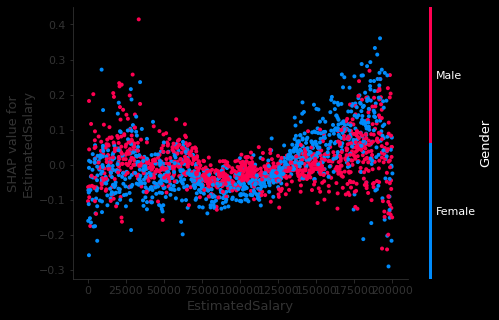

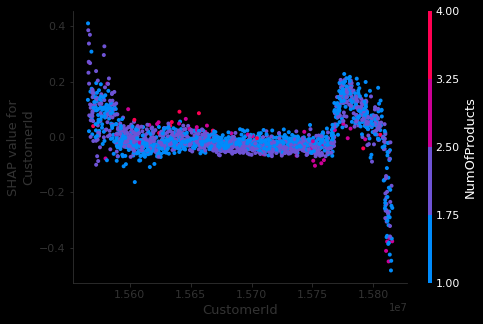

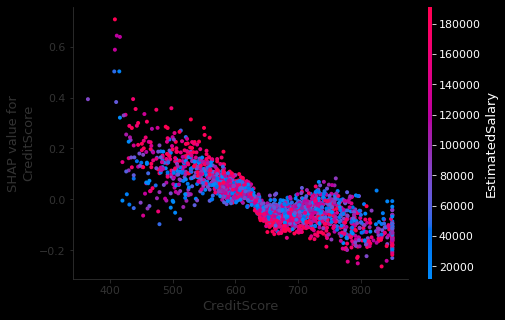

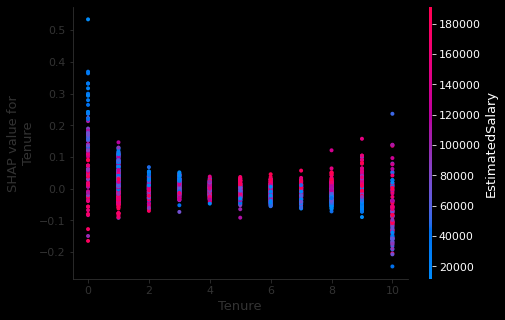

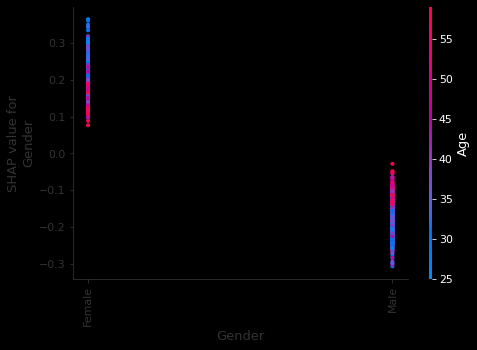

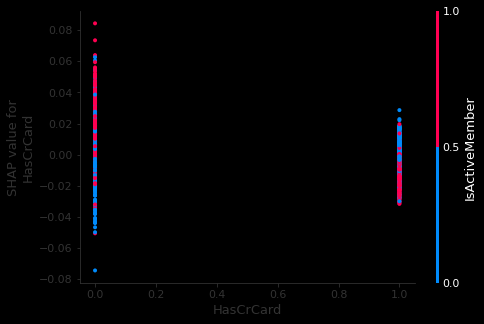

In [116]:
for feature in features:
  shap.dependence_plot(feature, shap_values, test[X])

# Классификация == Регрессия(технически)

In [117]:
test[X]

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15645353,607,France,Male,26,1,0.00,1,1,0,29818.20
1,15594576,524,France,Male,32,1,144875.71,1,0,0,187740.04
2,15811927,733,France,Female,38,3,157658.36,1,0,0,19658.43
3,15675675,850,France,Female,32,5,106290.64,1,1,0,121982.73
4,15682914,850,France,Male,34,2,72079.71,1,1,1,115767.93
...,...,...,...,...,...,...,...,...,...,...,...
1995,15795079,596,Spain,Male,67,6,0.00,2,1,1,138350.74
1996,15601550,595,Spain,Male,36,6,85768.42,1,1,1,24802.77
1997,15659366,807,France,Male,43,1,105799.32,2,1,0,34888.04
1998,15740072,720,France,Female,37,2,120328.88,2,1,1,138470.21


In [118]:
model.predict(test[X], prediction_type='RawFormulaVal')

array([-1.88475323, -2.52652396, -1.47044046, ..., -1.73922605,
       -2.68750234, -2.93959577])

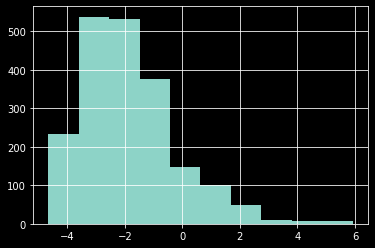

In [119]:
pd.Series(model.predict(test[X], prediction_type='RawFormulaVal')).hist();

In [120]:
import math

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [121]:
pd.Series(model.predict(test[X], prediction_type='RawFormulaVal')).apply(sigmoid)

0       0.131844
1       0.074020
2       0.186876
3       0.087403
4       0.056658
          ...   
1995    0.026803
1996    0.084712
1997    0.149411
1998    0.063715
1999    0.050231
Length: 2000, dtype: float64

In [122]:
model.predict_proba(test[X])

array([[0.86815614, 0.13184386],
       [0.92598046, 0.07401954],
       [0.81312433, 0.18687567],
       ...,
       [0.85058873, 0.14941127],
       [0.93628515, 0.06371485],
       [0.94976945, 0.05023055]])

In [123]:
model.predict(test[X], prediction_type='Probability')

array([[0.86815614, 0.13184386],
       [0.92598046, 0.07401954],
       [0.81312433, 0.18687567],
       ...,
       [0.85058873, 0.14941127],
       [0.93628515, 0.06371485],
       [0.94976945, 0.05023055]])

# Скор и пороги

In [124]:
test

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod,age_group,score_prod_age,score_prod_age_active,score_cat_prod_age_active,score_cat_all_features
0,9168,15645353,Chubb,607,France,Male,26,1,0.00,1,1,0,29818.20,0,0.274995,"(0.0, 31.0]",0.106774,0.143885,0.127267,0.131844
1,9388,15594576,Zhdanov,524,France,Male,32,1,144875.71,1,0,0,187740.04,0,0.274419,"(31.0, 35.0]",0.135908,0.177650,0.160071,0.074020
2,6860,15811927,Marcelo,733,France,Female,38,3,157658.36,1,0,0,19658.43,0,0.274637,"(35.0, 40.0]",0.198646,0.223714,0.235787,0.186876
3,3501,15675675,Slate,850,France,Female,32,5,106290.64,1,1,0,121982.73,0,0.274771,"(31.0, 35.0]",0.135908,0.177650,0.160071,0.087403
4,6234,15682914,Bolton,850,France,Male,34,2,72079.71,1,1,1,115767.93,0,0.275213,"(31.0, 35.0]",0.135908,0.094286,0.102859,0.056658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7393,15795079,Nnaife,596,Spain,Male,67,6,0.00,2,1,1,138350.74,0,0.076392,"(46.0, inf]",0.225869,0.134048,0.052185,0.026803
1996,3234,15601550,Genovesi,595,Spain,Male,36,6,85768.42,1,1,1,24802.77,0,0.274413,"(35.0, 40.0]",0.198646,0.173121,0.127713,0.084712
1997,219,15659366,Shih,807,France,Male,43,1,105799.32,2,1,0,34888.04,1,0.076980,"(40.0, 46.0]",0.106239,0.144262,0.147568,0.149411
1998,4756,15740072,Padovesi,720,France,Female,37,2,120328.88,2,1,1,138470.21,0,0.076992,"(35.0, 40.0]",0.059977,0.042353,0.039976,0.063715


<AxesSubplot:>

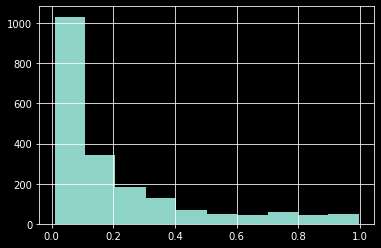

In [125]:
test['score_cat_all_features'].hist()

In [126]:
train['Exited'].mean()

0.20366666666666666

In [127]:
test['y_pred'] = (test['score_cat_all_features'] > 0.5) * 1

In [128]:
test

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,IsActiveMember,EstimatedSalary,Exited,score_prod,age_group,score_prod_age,score_prod_age_active,score_cat_prod_age_active,score_cat_all_features,y_pred
0,9168,15645353,Chubb,607,France,Male,26,1,0.00,1,...,0,29818.20,0,0.274995,"(0.0, 31.0]",0.106774,0.143885,0.127267,0.131844,0
1,9388,15594576,Zhdanov,524,France,Male,32,1,144875.71,1,...,0,187740.04,0,0.274419,"(31.0, 35.0]",0.135908,0.177650,0.160071,0.074020,0
2,6860,15811927,Marcelo,733,France,Female,38,3,157658.36,1,...,0,19658.43,0,0.274637,"(35.0, 40.0]",0.198646,0.223714,0.235787,0.186876,0
3,3501,15675675,Slate,850,France,Female,32,5,106290.64,1,...,0,121982.73,0,0.274771,"(31.0, 35.0]",0.135908,0.177650,0.160071,0.087403,0
4,6234,15682914,Bolton,850,France,Male,34,2,72079.71,1,...,1,115767.93,0,0.275213,"(31.0, 35.0]",0.135908,0.094286,0.102859,0.056658,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7393,15795079,Nnaife,596,Spain,Male,67,6,0.00,2,...,1,138350.74,0,0.076392,"(46.0, inf]",0.225869,0.134048,0.052185,0.026803,0
1996,3234,15601550,Genovesi,595,Spain,Male,36,6,85768.42,1,...,1,24802.77,0,0.274413,"(35.0, 40.0]",0.198646,0.173121,0.127713,0.084712,0
1997,219,15659366,Shih,807,France,Male,43,1,105799.32,2,...,0,34888.04,1,0.076980,"(40.0, 46.0]",0.106239,0.144262,0.147568,0.149411,0
1998,4756,15740072,Padovesi,720,France,Female,37,2,120328.88,2,...,1,138470.21,0,0.076992,"(35.0, 40.0]",0.059977,0.042353,0.039976,0.063715,0


In [129]:
test['y_pred'].mean()

0.1225

# Матрица ошибок

In [130]:
test

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,IsActiveMember,EstimatedSalary,Exited,score_prod,age_group,score_prod_age,score_prod_age_active,score_cat_prod_age_active,score_cat_all_features,y_pred
0,9168,15645353,Chubb,607,France,Male,26,1,0.00,1,...,0,29818.20,0,0.274995,"(0.0, 31.0]",0.106774,0.143885,0.127267,0.131844,0
1,9388,15594576,Zhdanov,524,France,Male,32,1,144875.71,1,...,0,187740.04,0,0.274419,"(31.0, 35.0]",0.135908,0.177650,0.160071,0.074020,0
2,6860,15811927,Marcelo,733,France,Female,38,3,157658.36,1,...,0,19658.43,0,0.274637,"(35.0, 40.0]",0.198646,0.223714,0.235787,0.186876,0
3,3501,15675675,Slate,850,France,Female,32,5,106290.64,1,...,0,121982.73,0,0.274771,"(31.0, 35.0]",0.135908,0.177650,0.160071,0.087403,0
4,6234,15682914,Bolton,850,France,Male,34,2,72079.71,1,...,1,115767.93,0,0.275213,"(31.0, 35.0]",0.135908,0.094286,0.102859,0.056658,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7393,15795079,Nnaife,596,Spain,Male,67,6,0.00,2,...,1,138350.74,0,0.076392,"(46.0, inf]",0.225869,0.134048,0.052185,0.026803,0
1996,3234,15601550,Genovesi,595,Spain,Male,36,6,85768.42,1,...,1,24802.77,0,0.274413,"(35.0, 40.0]",0.198646,0.173121,0.127713,0.084712,0
1997,219,15659366,Shih,807,France,Male,43,1,105799.32,2,...,0,34888.04,1,0.076980,"(40.0, 46.0]",0.106239,0.144262,0.147568,0.149411,0
1998,4756,15740072,Padovesi,720,France,Female,37,2,120328.88,2,...,1,138470.21,0,0.076992,"(35.0, 40.0]",0.059977,0.042353,0.039976,0.063715,0


In [131]:
from sklearn.metrics import confusion_matrix

In [132]:
confusion_matrix(test['Exited'], test['y_pred'])

array([[1537,   56],
       [ 218,  189]])

In [133]:
tn, fp, fn, tp = confusion_matrix(test['Exited'], test['y_pred']).ravel()

In [134]:
tn, fp, fn, tp

(1537, 56, 218, 189)

#Recall (полнота)

In [135]:
recall = tp / (tp+fn)

In [136]:
recall

0.4643734643734644

In [137]:
from sklearn.metrics import recall_score

In [138]:
recall_score(test['Exited'], test['y_pred'])

0.4643734643734644

# Precision (точность)

In [139]:
precision = tp / (tp + fp)

In [140]:
precision

0.7714285714285715

In [141]:
from sklearn.metrics import precision_score

In [142]:
precision_score(test['Exited'], test['y_pred'])

0.7714285714285715

#F1

In [143]:
f1 = (2 * recall * precision) / (recall + precision)

In [144]:
f1

0.5797546012269938

In [145]:
from sklearn.metrics import f1_score

In [146]:
f1_score(test['Exited'], test['y_pred'])

0.5797546012269938

# Accuracy

In [148]:
(test['Exited'] == test['y_pred']).mean()

0.863

In [149]:
(tp+tn) / (tp+tn+fp+fn)

0.863

In [150]:
from sklearn.metrics import accuracy_score

In [151]:
accuracy_score(test['Exited'], test['y_pred'])

0.863

# Classification report

In [152]:
from sklearn.metrics import classification_report

In [154]:
print(classification_report(test['Exited'], test['y_pred']))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.77      0.46      0.58       407

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



# Предикт с другим порогом

In [155]:
test['y_pred_new'] = (test['score_cat_all_features'] > 0.4) * 1

In [156]:
f1_score(test['Exited'], test['y_pred_new'])

0.6104972375690608

In [157]:
print(classification_report(test['Exited'], test['y_pred_new']))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1593
           1       0.70      0.54      0.61       407

    accuracy                           0.86      2000
   macro avg       0.79      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000



In [161]:
test['score_cat_all_features'].nunique()

2000

In [166]:
thrs = [0] + list(test['score_cat_all_features'].unique())

In [164]:
thrs[:20]

[0.13184386080460458,
 0.07401954387476314,
 0.18687567474270395,
 0.0874034938715728,
 0.056658162909274605,
 0.06161072773132977,
 0.5563161171624521,
 0.20388734500811342,
 0.0455555402676573,
 0.3665912024509706,
 0.05285404501123437,
 0.023898613831695264,
 0.025687510422433404,
 0.1636902819818866,
 0.253926767059399,
 0.7564224487666255,
 0.01869061442130417,
 0.5052261796760974,
 0.07183857505482731,
 0.035709043055949935]

In [167]:
min(thrs)

0

In [179]:
result = []

In [170]:
from tqdm.notebook import tqdm

In [180]:
for thr in tqdm(thrs):
  test['y_pred_new'] = (test['score_cat_all_features'] > thr) * 1
  result.append((thr, f1_score(test['Exited'], test['y_pred_new'])))

  0%|          | 0/2001 [00:00<?, ?it/s]

In [181]:
result[:10]

[(0, 0.3381803074366431),
 (0.13184386080460458, 0.5536277602523659),
 (0.07401954387476314, 0.47174447174447176),
 (0.18687567474270395, 0.5938069216757741),
 (0.0874034938715728, 0.4940239043824701),
 (0.056658162909274605, 0.43680709534368073),
 (0.06161072773132977, 0.44610091743119257),
 (0.5563161171624521, 0.5544871794871795),
 (0.20388734500811342, 0.6096153846153847),
 (0.0455555402676573, 0.40841457157516675)]

In [185]:
#pd.Series(result).sort_values(ascending=False)
t = pd.DataFrame(result, columns=['thr', 'f1'])

In [186]:
t.sort_values('f1', ascending=False)

,thr,f1
640,0.277932,0.636771
623,0.280837,0.636569
1343,0.276637,0.636058
1756,0.331582,0.636025
1228,0.278005,0.635955
...,...,...
238,0.992916,0.019465
315,0.993195,0.014634
180,0.994941,0.009780
1205,0.997245,0.004902


In [188]:
t[t['f1'] == t['f1'].max()]

,thr,f1
640,0.277932,0.636771


In [189]:
test

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,EstimatedSalary,Exited,score_prod,age_group,score_prod_age,score_prod_age_active,score_cat_prod_age_active,score_cat_all_features,y_pred,y_pred_new
0,9168,15645353,Chubb,607,France,Male,26,1,0.00,1,...,29818.20,0,0.274995,"(0.0, 31.0]",0.106774,0.143885,0.127267,0.131844,0,1
1,9388,15594576,Zhdanov,524,France,Male,32,1,144875.71,1,...,187740.04,0,0.274419,"(31.0, 35.0]",0.135908,0.177650,0.160071,0.074020,0,1
2,6860,15811927,Marcelo,733,France,Female,38,3,157658.36,1,...,19658.43,0,0.274637,"(35.0, 40.0]",0.198646,0.223714,0.235787,0.186876,0,1
3,3501,15675675,Slate,850,France,Female,32,5,106290.64,1,...,121982.73,0,0.274771,"(31.0, 35.0]",0.135908,0.177650,0.160071,0.087403,0,1
4,6234,15682914,Bolton,850,France,Male,34,2,72079.71,1,...,115767.93,0,0.275213,"(31.0, 35.0]",0.135908,0.094286,0.102859,0.056658,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7393,15795079,Nnaife,596,Spain,Male,67,6,0.00,2,...,138350.74,0,0.076392,"(46.0, inf]",0.225869,0.134048,0.052185,0.026803,0,0
1996,3234,15601550,Genovesi,595,Spain,Male,36,6,85768.42,1,...,24802.77,0,0.274413,"(35.0, 40.0]",0.198646,0.173121,0.127713,0.084712,0,1
1997,219,15659366,Shih,807,France,Male,43,1,105799.32,2,...,34888.04,1,0.076980,"(40.0, 46.0]",0.106239,0.144262,0.147568,0.149411,0,1
1998,4756,15740072,Padovesi,720,France,Female,37,2,120328.88,2,...,138470.21,0,0.076992,"(35.0, 40.0]",0.059977,0.042353,0.039976,0.063715,0,1


In [190]:
thrs = [0] + list(test['score_prod_age'].unique())

In [191]:
result = []
for thr in tqdm(thrs):
  test['y_pred_new'] = (test['score_prod_age'] > thr) * 1
  result.append((thr, f1_score(test['Exited'], test['y_pred_new'])))

  0%|          | 0/17 [00:00<?, ?it/s]

In [192]:
result[:10]

[(0, 0.3381803074366431),
 (0.10677382319173363, 0.4838940586972082),
 (0.13590844062947066, 0.5156507413509062),
 (0.1986455981941309, 0.5372233400402414),
 (0.5425055928411633, 0.21888412017167383),
 (0.10623946037099494, 0.45387453874538747),
 (0.031205673758865248, 0.3991995997999),
 (0.05997693194925029, 0.43132803632236094),
 (0.22586872586872586, 0.5594405594405594),
 (0.029292929292929294, 0.37228637413394916)]

In [193]:
#pd.Series(result).sort_values(ascending=False)
t = pd.DataFrame(result, columns=['thr', 'f1'])

In [194]:
t[t['f1'] == t['f1'].max()]

,thr,f1
8,0.225869,0.559441


#ROC

In [195]:
from sklearn.metrics import roc_curve

In [196]:
fprs, tprs, thrs = roc_curve(test['Exited'], test['score_cat_all_features'])

In [198]:
roc = pd.DataFrame({'fpr':fprs, 'tpr':tprs, 'thr':thrs})

In [199]:
roc

,fpr,tpr,thr
0,0.000000,0.000000,1.997318
1,0.000000,0.002457,0.997318
2,0.000000,0.061425,0.933737
3,0.000628,0.061425,0.933203
4,0.000628,0.120393,0.891551
...,...,...,...
391,0.979912,0.995086,0.012212
392,0.979912,0.997543,0.012198
393,0.998745,0.997543,0.009886
394,0.998745,1.000000,0.009809


<AxesSubplot:xlabel='fpr'>

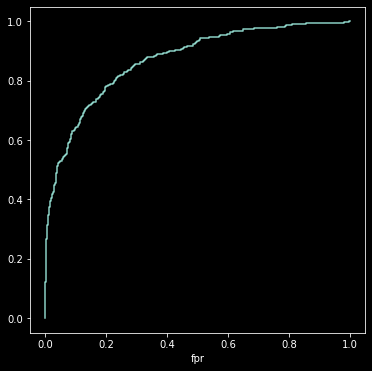

In [201]:
roc.set_index('fpr')['tpr'].plot(figsize=(6,6))

In [205]:
roc['random'] = roc['fpr']

In [207]:
roc['ideal'] = 1

<AxesSubplot:xlabel='fpr'>

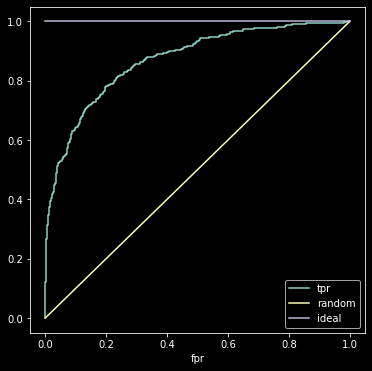

In [209]:
roc.plot(x='fpr', y=['tpr', 'random', 'ideal'], figsize=(6,6))

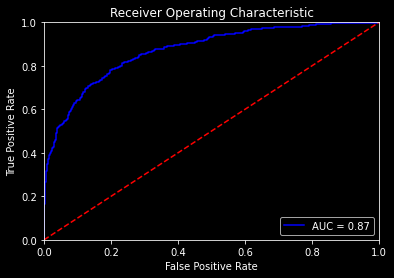

In [210]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(test['Exited'], test['score_cat_all_features'])
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [211]:
from  catboost.utils import get_roc_curve

In [212]:
test_data = Pool(data=test[X],
                  label=test[y],
                  cat_features=cat_features
                 )

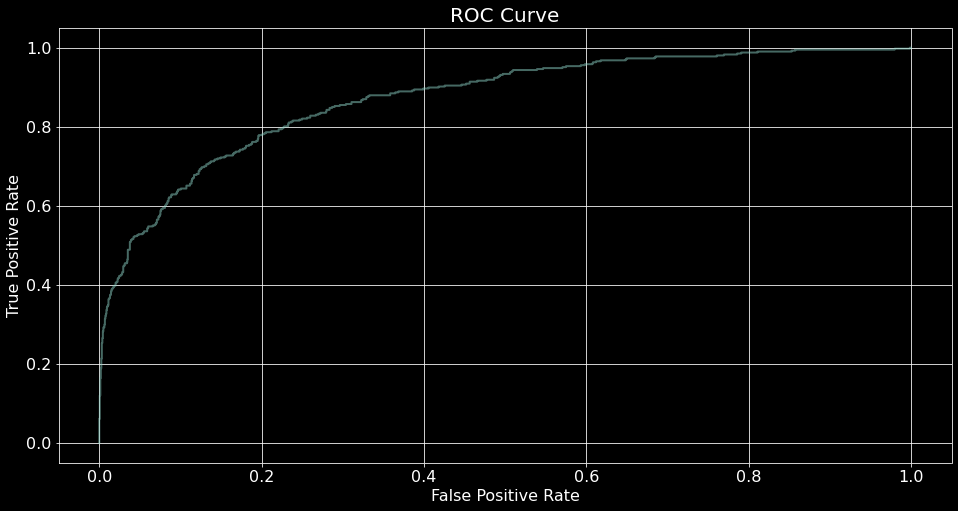

In [215]:
get_roc_curve(model, test_data, plot=True);

#AUC

In [216]:
from sklearn.metrics import roc_auc_score

In [217]:
roc_auc_score(test['Exited'], test['score_cat_all_features'])

0.8703063618317854

In [228]:
params = {
    'verbose':100,
    'eval_metric':'AUC',
    'random_seed':42,
    'learning_rate':0.005
}

In [229]:
model = CatBoostClassifier(**params)

In [230]:
model.fit(train_data, eval_set=valid_data)

0:	test: 0.8338545	best: 0.8338545 (0)	total: 9.53ms	remaining: 9.52s
100:	test: 0.8685508	best: 0.8685508 (99)	total: 770ms	remaining: 6.85s
200:	test: 0.8717192	best: 0.8717192 (200)	total: 1.56s	remaining: 6.19s
300:	test: 0.8752294	best: 0.8752740 (298)	total: 2.32s	remaining: 5.39s
400:	test: 0.8778990	best: 0.8779021 (399)	total: 3.13s	remaining: 4.67s
500:	test: 0.8798481	best: 0.8798481 (500)	total: 3.92s	remaining: 3.9s
600:	test: 0.8813276	best: 0.8813276 (600)	total: 5.75s	remaining: 3.82s
700:	test: 0.8822190	best: 0.8822436 (696)	total: 7.6s	remaining: 3.24s
800:	test: 0.8831504	best: 0.8832136 (795)	total: 9.64s	remaining: 2.4s
900:	test: 0.8837278	best: 0.8837293 (899)	total: 10.6s	remaining: 1.16s
999:	test: 0.8839618	best: 0.8840157 (997)	total: 11.3s	remaining: 0us

bestTest = 0.8840156666
bestIteration = 997

Shrink model to first 998 iterations.


# ROC AUC при сильно несбалансированных классах

In [ ]:
t = pd.DataFrame({})